In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_excel("Train_dataset.xlsx")

In [88]:
test = pd.read_excel("Test_dataset.xlsx")

In [43]:
train.dropna(inplace=True)

In [44]:
train.describe()

people_ID     Children     cases/1M    Deaths/1M          Age  \
count   6777.00000  6777.000000  6777.000000  6777.000000  6777.000000   
mean   10127.82721     1.001180     3.299985     0.523388    42.774384   
std     7128.69608     0.707106     2.739398     0.860087    15.738886   
min        1.00000     0.000000     1.000000     0.000000    16.000000   
25%     2648.00000     1.000000     2.000000     0.000000    28.000000   
50%    10052.00000     1.000000     2.000000     0.000000    46.000000   
75%    15120.00000     2.000000     4.000000     1.000000    55.000000   
max    22695.00000     2.000000     8.000000     2.000000    68.000000   

        Coma score     Diuresis    Platelets          HBB      d-dimer  \
count  6777.000000  6777.000000  6777.000000  6777.000000  6777.000000   
mean      9.021691   278.480891    87.340711   115.335989   275.417884   
std       3.704153    98.201980    41.745766    55.550704    43.650790   
min       3.000000   110.000000    15.000000    20.000000   200.000000   
25%       6.000000   194.000000    52.000000    67.000000   237.000000   
50%       9.000000   276.000000    88.000000   116.000000   276.000000   
75%      12.000000   365.000000   124.000000   164.000000   313.000000   
max      15.000000   450.000000   160.000000   210.000000   350.000000   

        Heart rate  HDL cholesterol  Charlson Index  Blood Glucose  \
count  6777.000000      6777.000000     6777.000000    6777.000000   
mean     74.745020        52.779253       20.054596       5.014756   
std      14.858241        10.397627       11.859318       1.390670   
min      50.000000        35.000000        0.000000       3.000000   
25%      62.000000        44.000000       10.000000       4.000000   
50%      75.000000        53.000000       20.000000       5.000000   
75%      88.000000        62.000000       30.000000       6.000000   
max     100.000000        70.000000       40.000000       7.000000   

          Insurance        salary     FT/month  Infect_Prob  
count  6.777000e+03  6.777000e+03  6777.000000  6777.000000  
mean   2.644371e+06  1.308322e+06     1.011067    52.125324  
std    1.383605e+06  6.089565e+05     0.811678    11.026704  
min    3.000000e+05  3.000000e+05     0.000000    29.289600  
25%    1.400000e+06  8.000000e+05     0.000000    47.206909  
50%    2.600000e+06  1.300000e+06     1.000000    48.695159  
75%    3.800000e+06  1.800000e+06     2.000000    52.685400  
max    5.000000e+06  2.300000e+06     2.000000    97.632000

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 6777 non-null int64
Region                    6777 non-null object
Gender                    6777 non-null object
Designation               6777 non-null object
Name                      6777 non-null object
Married                   6777 non-null object
Children                  6777 non-null float64
Occupation                6777 non-null object
Mode_transport            6777 non-null object
cases/1M                  6777 non-null int64
Deaths/1M                 6777 non-null int64
comorbidity               6777 non-null object
Age                       6777 non-null int64
Coma score                6777 non-null int64
Pulmonary score           6777 non-null object
cardiological pressure    6777 non-null object
Diuresis                  6777 non-null float64
Platelets                 6777 non-null float64
HBB                       6777 non-null float64


In [46]:
train.head()

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   
5          6  Bhubaneshwar  Female         Mrs          sandhya     YES   

   Children     Occupation Mode_transport  cases/1M     ...         HBB  \
0       1.0         Farmer         Public         2     ...        93.0   
2       1.0        Cleaner         Public         2     ...       137.0   
3       1.0         Driver            Car         2     ...       167.0   
4       2.0  Manufacturing            Car         2     ...       153.0   
5       1.0          Clerk         Public         2     ...        86.0   

  d-dimer  Heart rate  HDL cholesterol Charlson Index Blood Glucose  \
0   233.0        82.0             58.0             27             7   
2   213.0        77.0             43.0             40             6   
3   275.0        64.0             60.0             27             7   
4   331.0        71.0             64.0             32             7   
5   216.0        94.0             38.0              5             5   

   Insurance   salary  FT/month  Infect_Prob  
0  3600000.0  1300000       2.0    49.135010  
2  3400000.0   900000       1.0    73.224000  
3   700000.0  2300000       1.0    48.779225  
4  3200000.0  1100000       1.0    87.868800  
5  4600000.0  1900000       2.0    49.518345  

[5 rows x 28 columns]

### Columns exploring


In [47]:
train.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [77]:
def get_unique(data,columns):
    ls = []
    for i in columns:
        temp = np.unique(data[i],return_counts=True)
        print(temp)
        print("*************************************************************************************************")
        ls.append(temp)

In [102]:
ret = get_unique(train,['Region', 'Gender', 'Designation', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cardiological pressure',
       'comorbidity', 'Pulmonary score'])

(array(['Bengaluru', 'Bhubaneshwar', 'Chandigarh', 'Chennai', 'Delhi'],
      dtype=object), array([1661, 1627, 1658, 1606,  225]))
*************************************************************************************************
(array(['Female', 'Male'], dtype=object), array([3402, 3375]))
*************************************************************************************************
(array(['Mr', 'Mrs'], dtype=object), array([3375, 3402]))
*************************************************************************************************
(array(['NO', 'YES'], dtype=object), array([1517, 5260]))
*************************************************************************************************
(array([0., 1., 2.]), array([1690, 3389, 1698]))
*************************************************************************************************
(array(['Business', 'Cleaner', 'Clerk', 'Driver', 'Farmer', 'Legal',
       'Manufacturing', 'Researcher', 'Sales'], dtype=object), array([713, 751, 7

In [103]:
ret = get_unique(test,['Region', 'Gender', 'Designation', 'Married',
       'Children', 'Occupation', 'Mode_transport',
       'comorbidity', 'Pulmonary score'])

(array(['Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune',
       'Thiruvananthapuram'], dtype=object), array([2078, 2457, 2483, 2475, 2503, 2502]))
*************************************************************************************************
(array(['Female', 'Male'], dtype=object), array([7106, 7392]))
*************************************************************************************************
(array(['Mr', 'Mrs'], dtype=object), array([7392, 7106]))
*************************************************************************************************
(array(['NO', 'YES'], dtype=object), array([ 3011, 11487]))
*************************************************************************************************
(array([0, 1, 2]), array([4933, 4937, 4628]))
*************************************************************************************************
(array(['Business', 'Cleaner', 'Clerk', 'Driver', 'Farmer', 'Legal',
       'Manufacturing', 'Researcher', 'Sales'], dtype=object), ar

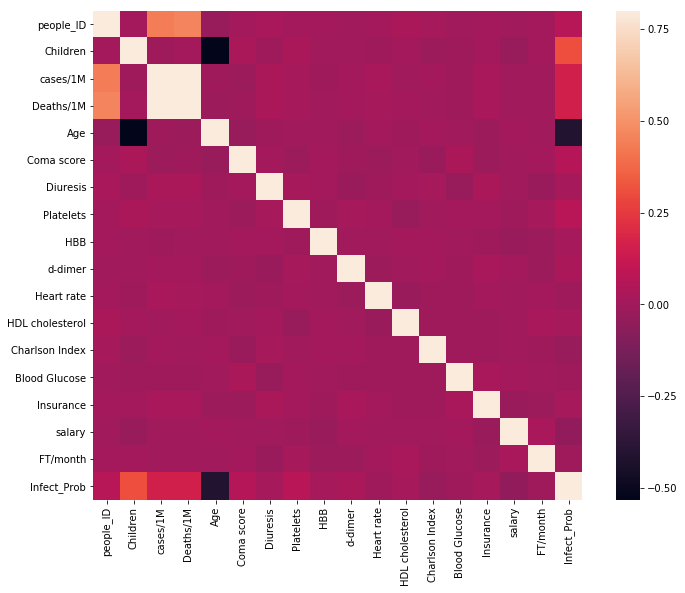

In [79]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

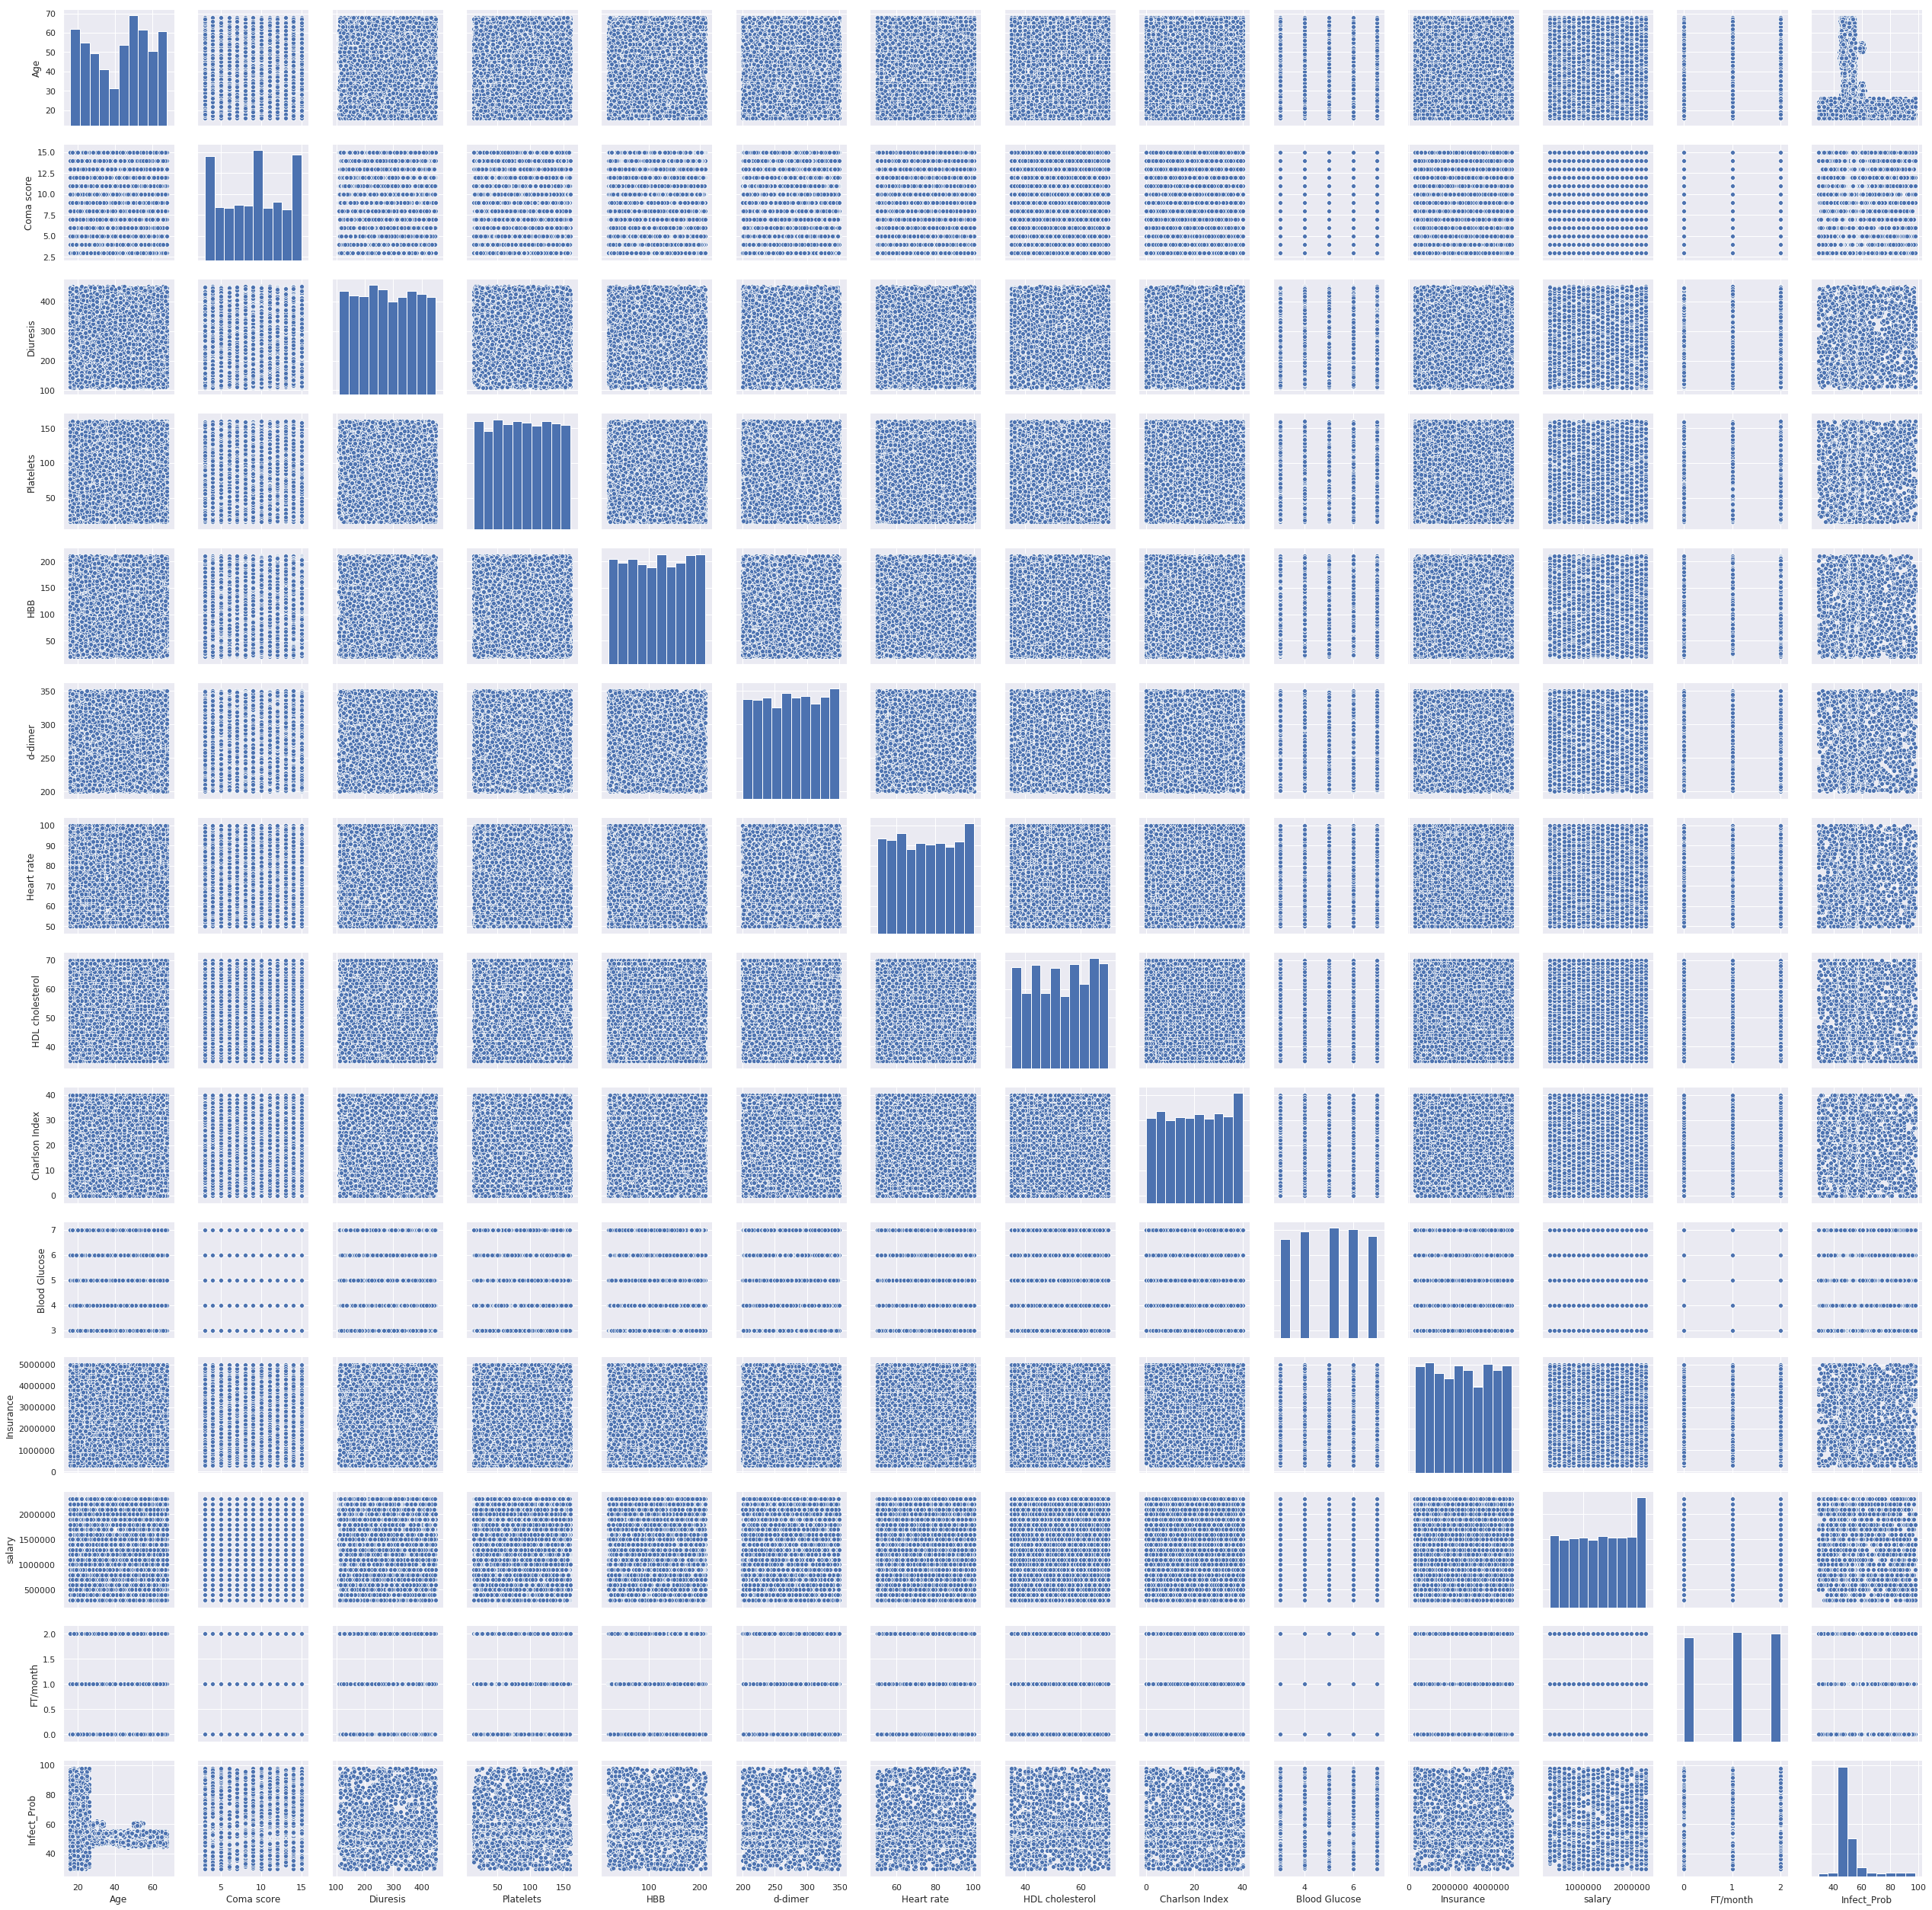

In [82]:
#scatterplot
sns.set()
cols = [ 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose','cases/1M', 'Deaths/1M',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob']
sns.pairplot(train[cols])
plt.show();

In [106]:
cat_col = ['Gender', 'Designation', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cardiological pressure',
       'comorbidity', 'Pulmonary score']

In [107]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = train[cat_col]
label_X_test = test[cat_col]

# Apply label encoder 
label_encoder = LabelEncoder()
for col in set(cat_col):
    label_X_train[col] = label_encoder.fit_transform(train[col])
    label_X_test[col] = label_encoder.transform(test[col]) # Your code here

In [108]:
label_X_train

Gender  Designation  Married  Children  Occupation  Mode_transport  \
0           0            1        1         1           4               1   
2           0            1        0         1           1               1   
3           0            1        1         1           3               0   
4           0            1        0         2           6               0   
5           0            1        1         1           2               1   
7           0            1        1         1           6               1   
9           0            1        1         1           4               1   
10          0            1        1         1           6               1   
11          0            1        1         0           3               0   
13          0            1        1         2           0               1   
15          0            1        1         1           4               2   
16          0            1        1         2           8               1   
17          0            1        1         0           7               2   
18          0            1        1         1           2               1   
19          0            1        1         2           7               1   
22          0            1        0         2           3               1   
23          0            1        1         1           1               0   
24          0            1        0         2           2               0   
25          0            1        1         0           4               1   
26          0            1        1         2           6               1   
27          0            1        1         1           6               1   
29          0            1        1         1           6               0   
32          0            1        1         2           5               1   
36          0            1        1         2           0               1   
38          0            1        1         0           4               2   
40          0            1        1         0           0               1   
42          0            1        1         0           7               0   
48          0            1        1         1           5               2   
50          0            1        1         0           6               2   
52          0            1        1         0           8               0   
...       ...          ...      ...       ...         ...             ...   
10672       1            0        1         2           2               2   
10674       1            0        0         2           5               0   
10675       1            0        1         1           2               0   
10676       1            0        1         0           4               0   
10677       1            0        1         1           4               0   
10678       1            0        1         0           3               2   
10679       1            0        1         1           5               0   
10680       1            0        1         1           0               0   
10681       1            0        1         1           4               0   
10682       1            0        1         1           4               2   
10683       1            0        1         1           1               1   
10684       1            0        1         0           6               2   
10685       1            0        1         2           4               0   
10689       1            0        1         1           3               0   
10691       1            0        1         1           0               1   
10693       1            0        0         2           1               1   
10694       1            0        1         0           8               2   
10695       1            0        1         0           4               2   
10696       1            0        1         1           1               2   
10698       1            0        0         1           4               0   
107

In [110]:
from sklearn.preprocessing import OneHotEncoder
# Use as many lines of code as you need!
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(label_X_train[[ 'Gender', 'Designation', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cardiological pressure',
       'comorbidity', 'Pulmonary score']]))


In [112]:

OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(label_X_test[[ 'Gender', 'Designation', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cardiological pressure',
       'comorbidity', 'Pulmonary score']]))


In [148]:
# Remove categorical columns (will replace with one-hot encoding)
train = train.drop(cat_col, axis=1)
test = test.drop(cat_col, axis=1)
# One-hot encoding removed index; put it back
OH_cols_train.index = train.index
OH_cols_test.index = test.index

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([train, OH_cols_train], axis=1) # Your code here
OH_X_test = pd.concat([test, OH_cols_test], axis=1) # Your code here


In [149]:
OH_cols_train.shape


(6777, 33)

In [150]:
OH_X_train.shape

(6777, 52)

In [151]:
train.shape

(6777, 19)

In [158]:
OH_X_train.head()

cases/1M  Deaths/1M  Age  Coma score  Diuresis  Platelets    HBB  d-dimer  \
0         2          0   68           8     441.0      154.0   93.0    233.0   
2         2          0   19          13     416.0      124.0  137.0    213.0   
3         2          0   33           9     410.0       98.0  167.0    275.0   
4         2          0   23           7     390.0       21.0  153.0    331.0   
5         2          0   35           9     389.0      139.0   86.0    216.0   

   Heart rate  HDL cholesterol ...    23   24   25   26   27   28   29   30  \
0        82.0             58.0 ...   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2        77.0             43.0 ...   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3        64.0             60.0 ...   1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
4        71.0             64.0 ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
5        94.0             38.0 ...   0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   

    31   32  
0  0.0  1.0  
2  1.0  0.0  
3  0.0  0.0  
4  0.0  1.0  
5  0.0  0.0  

[5 rows x 49 columns]

In [154]:
OH_X_test.shape

(14498, 51)

In [156]:
OH_X_train = OH_X_train.drop(["people_ID","Region","Name"], axis=1)
OH_X_test = OH_X_test.drop(["people_ID","Region","Name"], axis=1)

In [159]:
OH_X_train.head()

cases/1M  Deaths/1M  Age  Coma score  Diuresis  Platelets    HBB  d-dimer  \
0         2          0   68           8     441.0      154.0   93.0    233.0   
2         2          0   19          13     416.0      124.0  137.0    213.0   
3         2          0   33           9     410.0       98.0  167.0    275.0   
4         2          0   23           7     390.0       21.0  153.0    331.0   
5         2          0   35           9     389.0      139.0   86.0    216.0   

   Heart rate  HDL cholesterol ...    23   24   25   26   27   28   29   30  \
0        82.0             58.0 ...   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2        77.0             43.0 ...   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3        64.0             60.0 ...   1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
4        71.0             64.0 ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
5        94.0             38.0 ...   0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   

    31   32  
0  0.0  1.0  
2  1.0  0.0  
3  0.0  0.0  
4  0.0  1.0  
5  0.0  0.0  

[5 rows x 49 columns]

### Modeling

In [163]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [164]:
OH_X_train.to_csv("Train_Clean.csv")
OH_X_test.to_csv("Test_Clean.csv")